In [31]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

train_files_healthy = "archive1/Train/Train/Healthy"
train_files_powdery = "archive1/Train/Train/Powdery"
train_files_rust = "archive1/Train/Train/Rust"

test_files_healthy = "archive1/Test/Test/Healthy"
test_files_powdery = "archive1/Test/Test/Powdery"
test_files_rust = "archive1/Test/Test/Rust"

valid_files_healthy = "archive1/Validation/Validation/Healthy"
valid_files_powdery = "archive1/Validation/Validation/Powdery"
valid_files_rust = "archive1/Validation/Validation/Rust"

print("Number of healthy leaf images in training set", total_files(train_files_healthy))
print("Number of powder leaf images in training set", total_files(train_files_powdery))
print("Number of rusty leaf images in training set", total_files(train_files_rust))

print("========================================================")

print("Number of healthy leaf images in test set", total_files(test_files_healthy))
print("Number of powder leaf images in test set", total_files(test_files_powdery))
print("Number of rusty leaf images in test set", total_files(test_files_rust))

print("========================================================")

print("Number of healthy leaf images in validation set", total_files(valid_files_healthy))
print("Number of powder leaf images in validation set", total_files(valid_files_powdery))
print("Number of rusty leaf images in validation set", total_files(valid_files_rust))

Number of healthy leaf images in training set 458
Number of powder leaf images in training set 430
Number of rusty leaf images in training set 434
Number of healthy leaf images in test set 50
Number of powder leaf images in test set 50
Number of rusty leaf images in test set 50
Number of healthy leaf images in validation set 20
Number of powder leaf images in validation set 20
Number of rusty leaf images in validation set 20


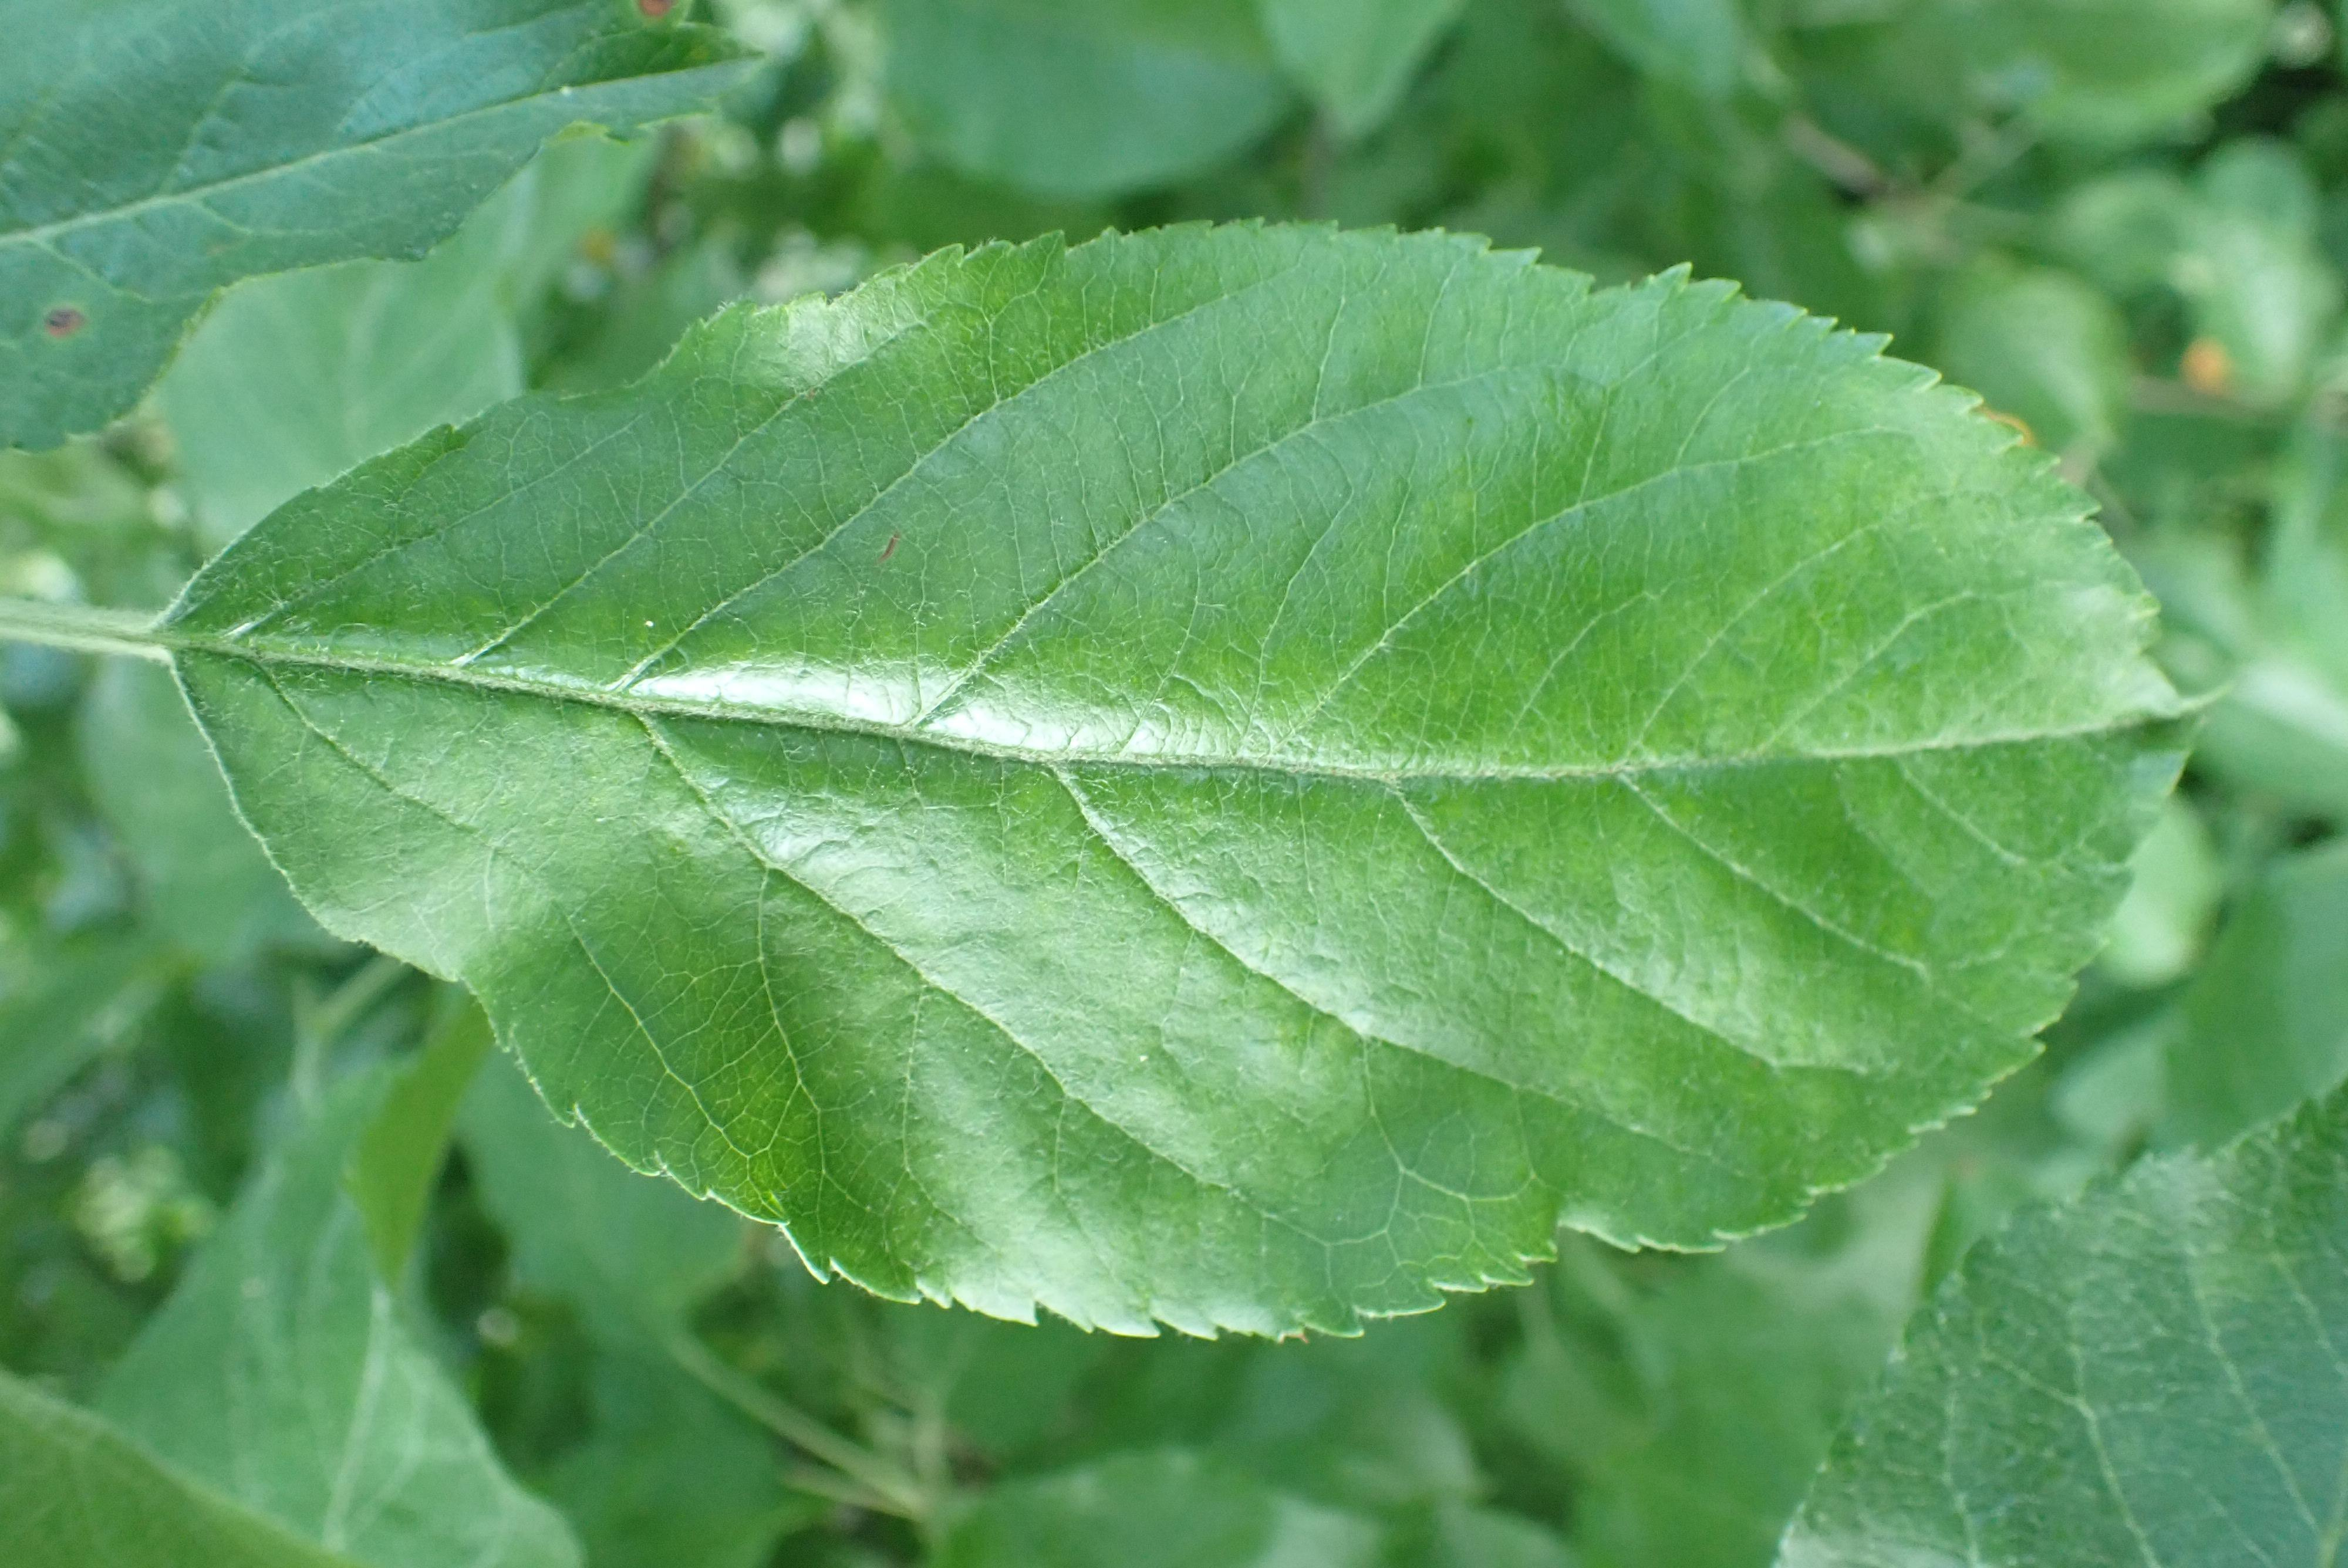

In [32]:
from PIL import Image
import IPython.display as display

image_path = 'archive1/Train/Train/Healthy/8ce77048e12f3dd4.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

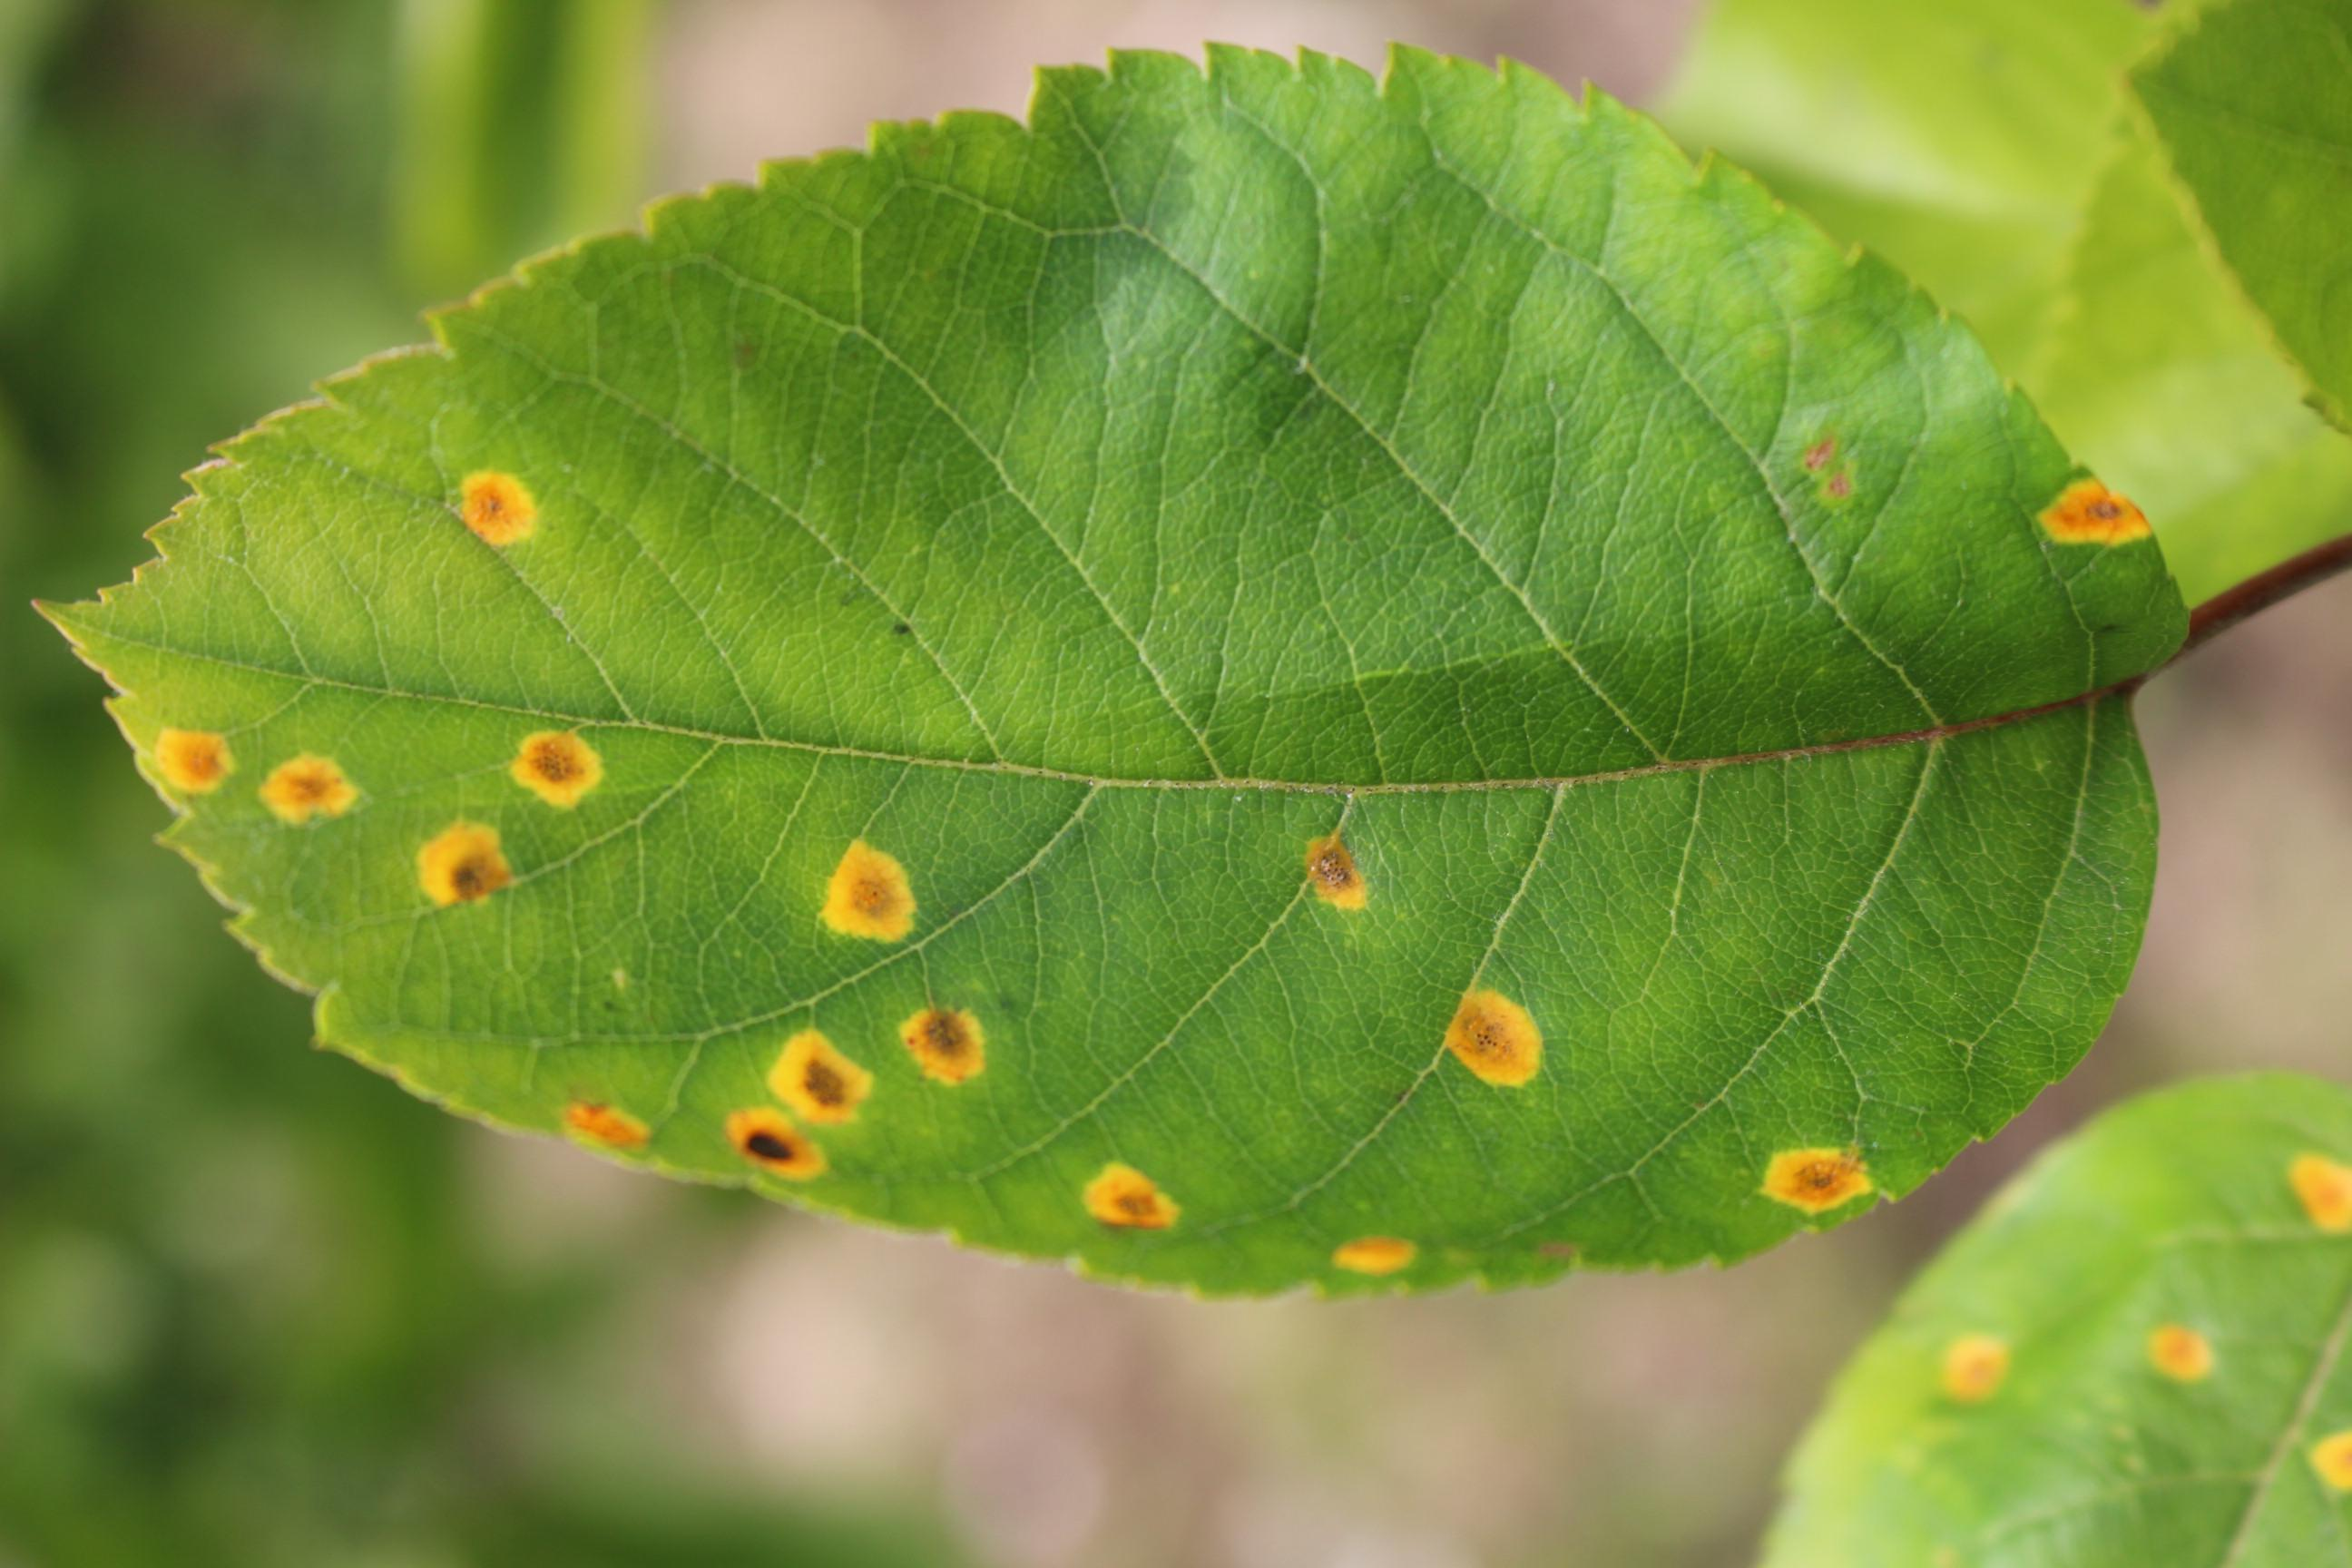

In [33]:
image_path = 'archive1/Train/Train/Rust/80f09587dfc7988e.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

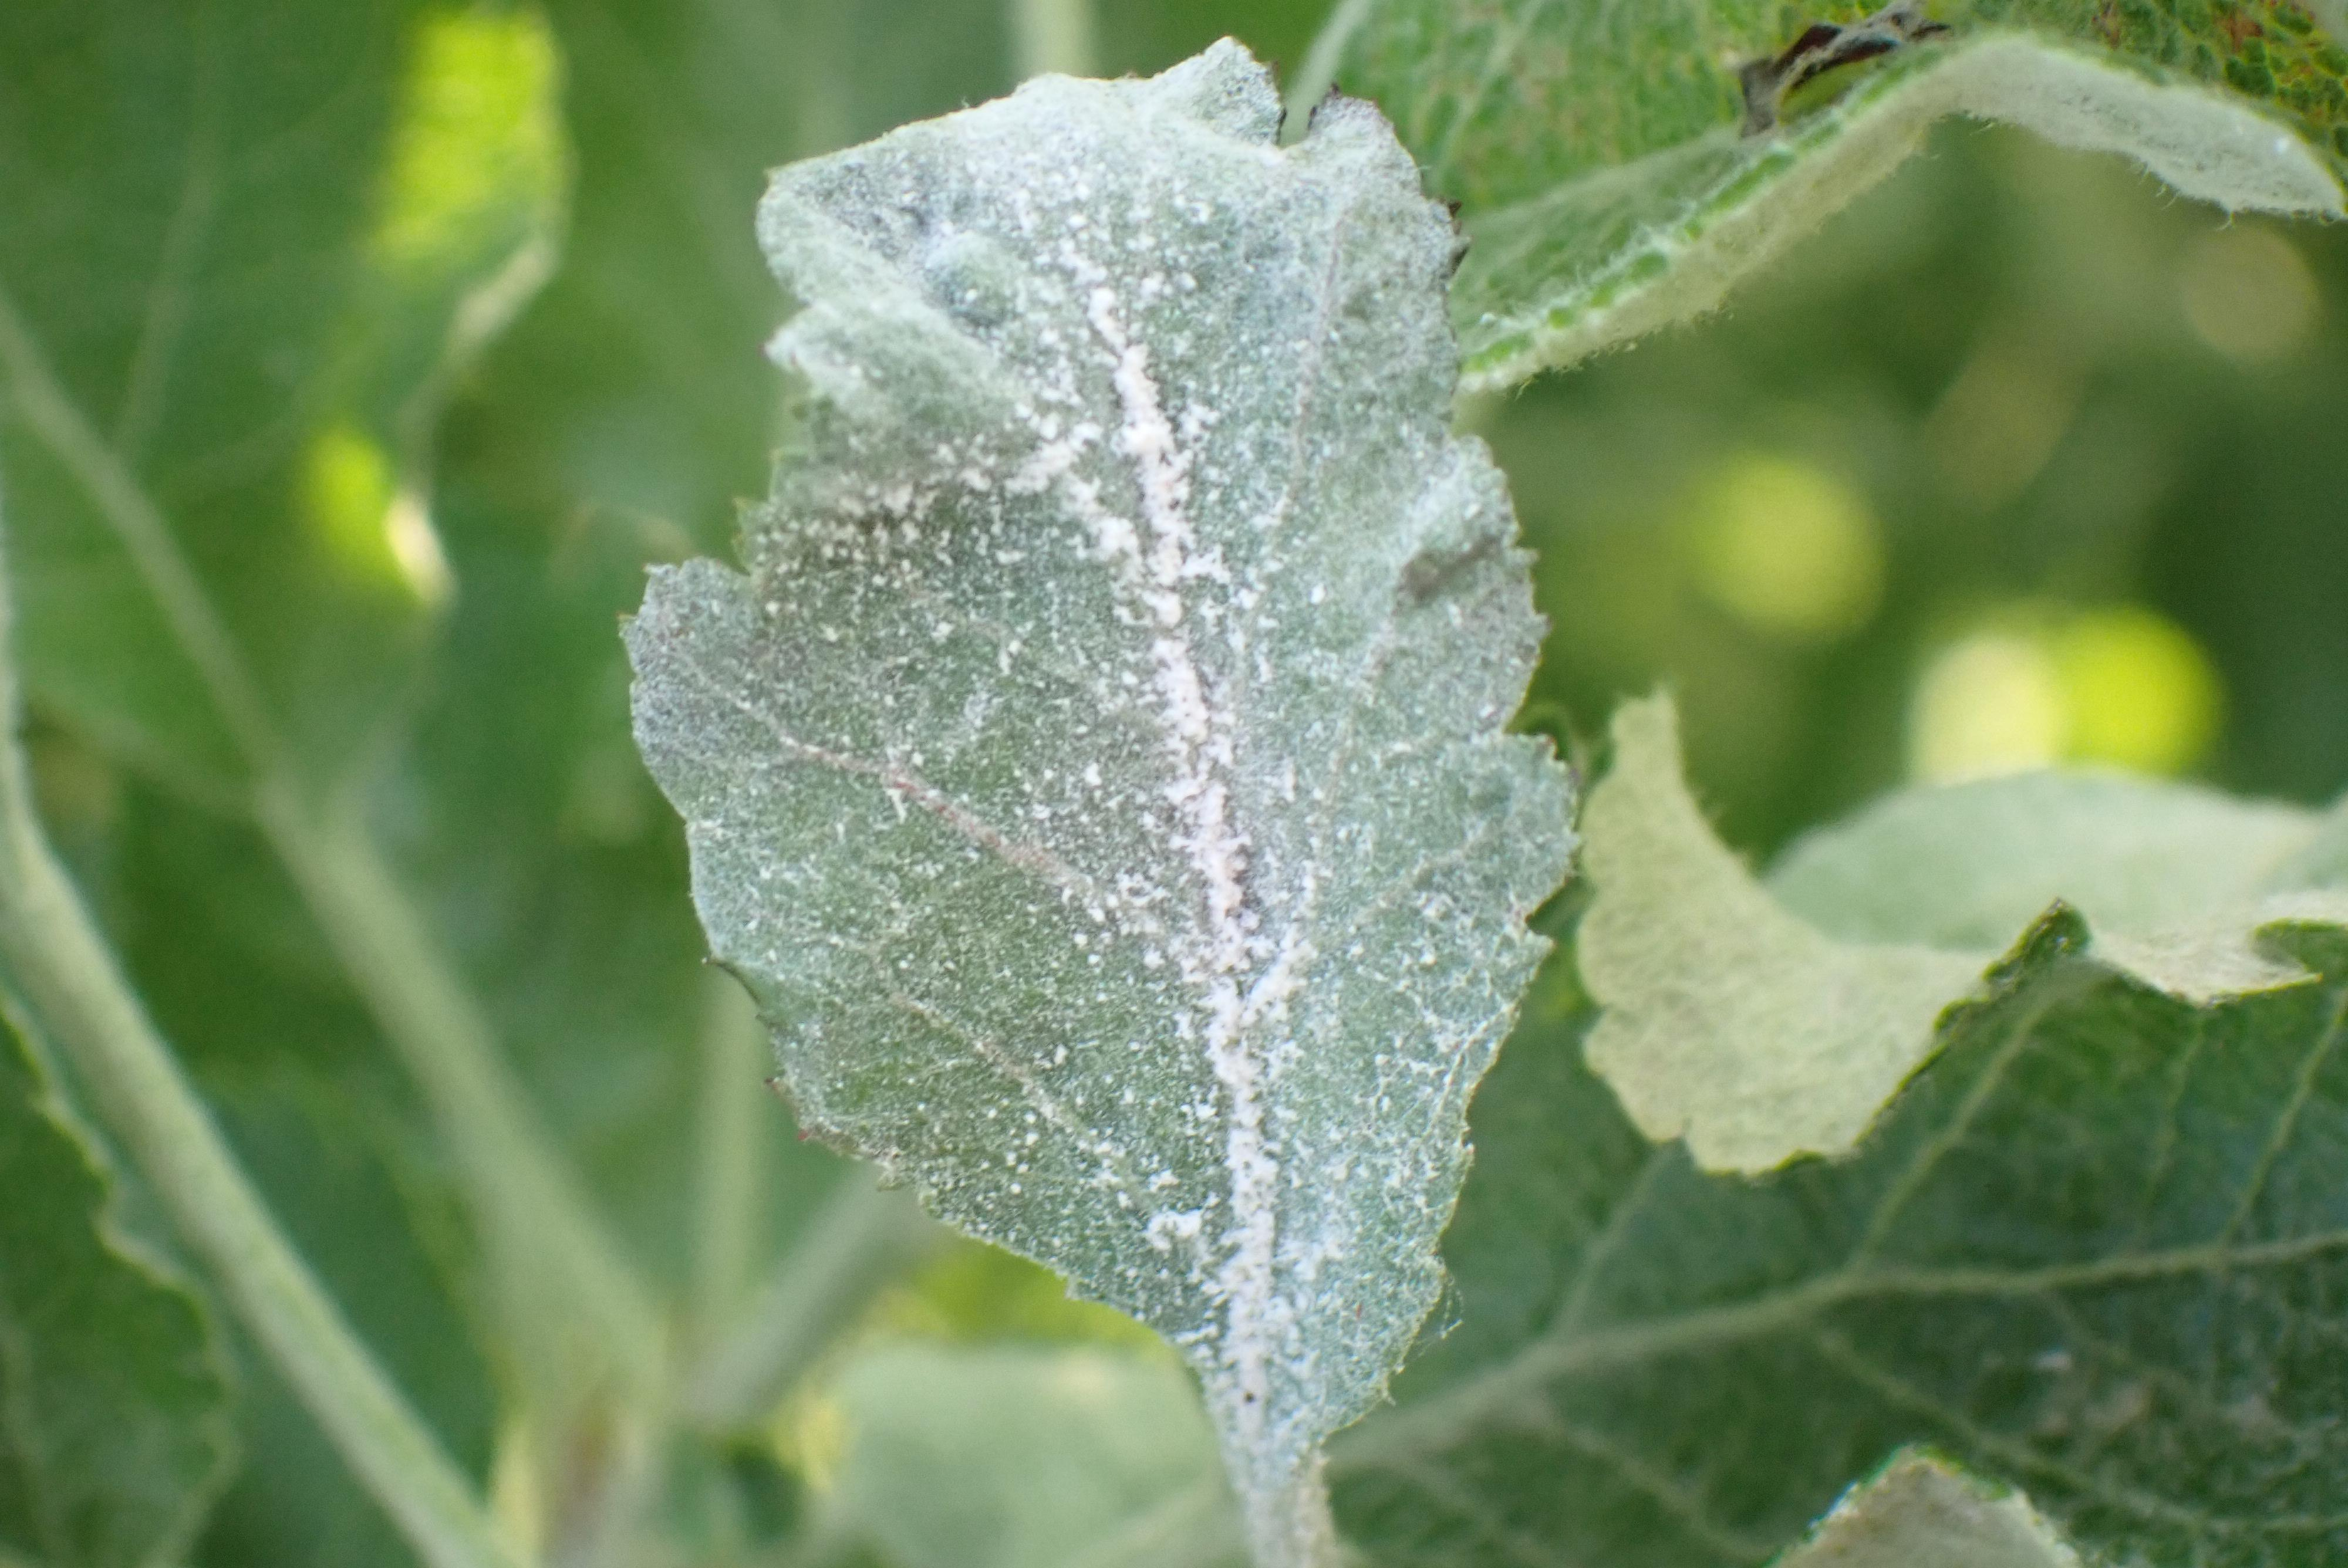

In [34]:
image_path = 'archive1/Train/Train/Powdery/8d9e40b6ad51753a.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [36]:
train_generator = train_datagen.flow_from_directory('archive1/Train/Train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('archive1/Validation/Validation',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')


Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [37]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

/Users/inukagajanayake/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
	
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )

/Users/inukagajanayake/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.3582 - loss: 4.8444 - val_accuracy: 0.5333 - val_loss: 0.9279
Epoch 2/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.6105 - loss: 0.8762 - val_accuracy: 0.6167 - val_loss: 0.8594
Epoch 3/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.7200 - loss: 0.7331 - val_accuracy: 0.7833 - val_loss: 0.5169
Epoch 4/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.8401 - loss: 0.4564 - val_accuracy: 0.8667 - val_loss: 0.3755
Epoch 5/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.9091 - loss: 0.2958 - val_accuracy: 0.8000 - val_loss: 0.5840


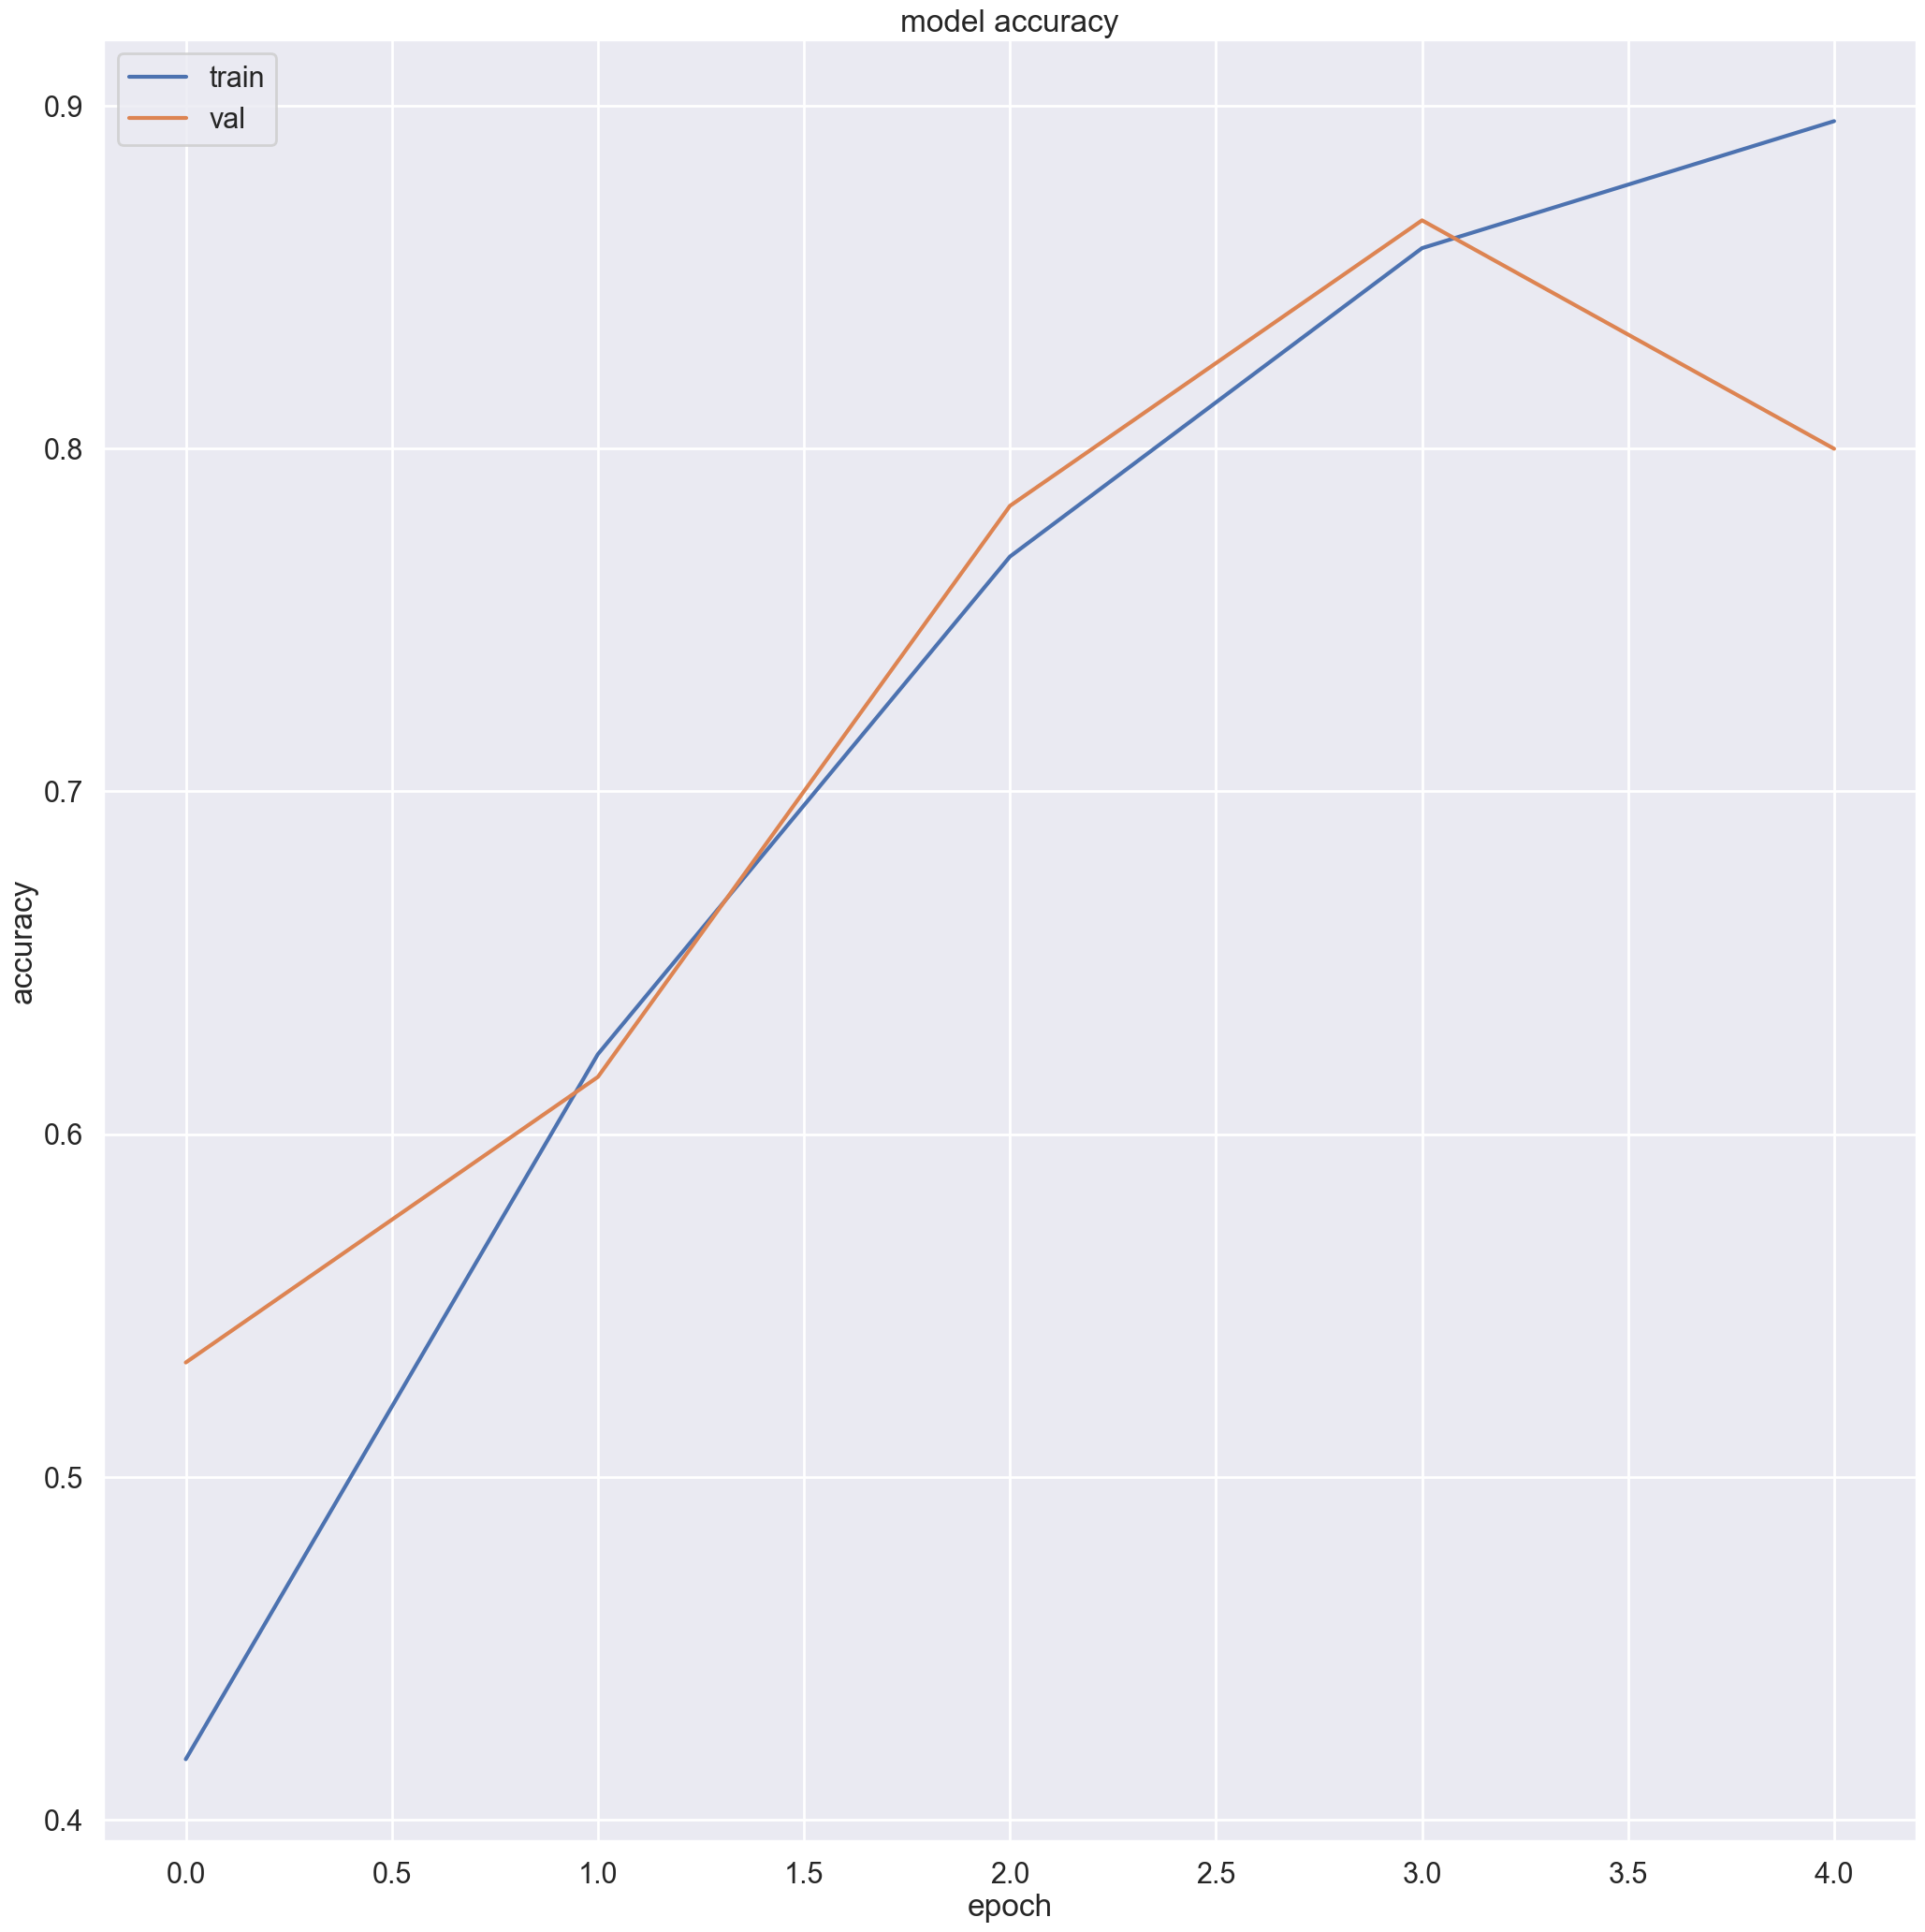

In [40]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [41]:
model.save("model.h5")

In [42]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image('archive1/Test/Test/Rust/82f49a4a7b9585f1.jpg')

In [43]:
predictions = model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


array([8.1394231e-03, 1.1005739e-05, 9.9184954e-01], dtype=float32)

In [44]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [45]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Rust


In [46]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image('archive1/Test/Test/Powdery/9ec7295cb1d44c2d.jpg')

In [47]:
predictions = model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([0.0236978 , 0.97010136, 0.00620087], dtype=float32)

In [48]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [49]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Powdery


In [50]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image('archive1/Test/Test/Healthy/8def4d91382175c3.jpg')

In [51]:
predictions = model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([8.2578737e-01, 5.5576438e-06, 1.7420714e-01], dtype=float32)

In [52]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [53]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Healthy
